In [1]:
# Importing Libraries
import seaborn as sns
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_US = df[df['job_country'] == 'United States']
df_US = df_US.dropna(subset = ['salary_year_avg'])

In [6]:
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [10]:
#top 6 job titles...

job_titles = df_US['job_title_short'].value_counts().index[0:6].tolist()

In [11]:
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [14]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [27]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

In [15]:
df_US_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


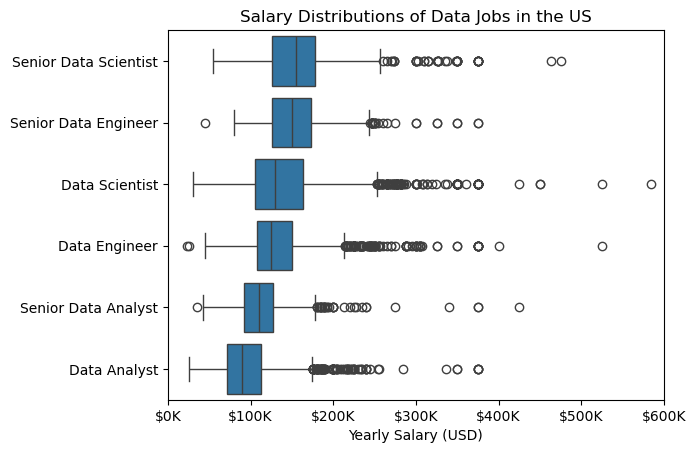

In [29]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short',order=job_order)

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [30]:
#Investing medain salaries for data Analyst roles

In [39]:
df_US  = df_US[(df_US['job_title_short'] == 'Data Analyst') & (df_US['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])

In [38]:
df_US_explode = df_US.explode('job_skills')
df_US_explode[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [51]:
df_DA_top_pay = df_US_explode.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='median', ascending=False).head(10)
df_DA_top_pay

,median,count
job_skills,,
dplyr,196250.0,2
bitbucket,189000.0,3
gitlab,186000.0,3
solidity,179000.0,1
hugging face,175000.0,1
couchbase,160515.0,1
ansible,159640.0,1
mxnet,149000.0,2
cassandra,148250.0,6


In [64]:
df_DA_skills = df_US_explode.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='count', ascending=False).head(10)
df_DA_skills

,median,count
job_skills,,
sql,91000.00,2508
excel,84392.00,1808
python,97500.00,1431
tableau,92875.00,1364
sas,90000.00,926
r,92500.00,893
power bi,90000.00,838
powerpoint,85000.00,462
word,81194.75,461


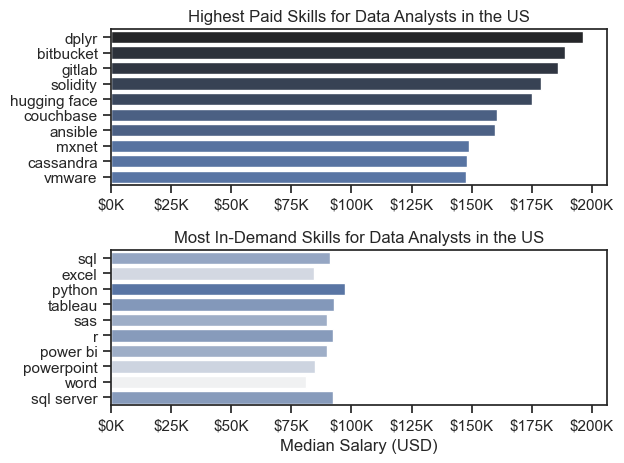

In [63]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()